In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [3]:
df = pd.read_csv('C:/Users/516-29/Deep/chap11/data/iris.csv')
df.info()
print('------------------------------------------')
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
------------------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...           

In [15]:
data = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [16]:
from sklearn.model_selection import train_test_split

x, y = train_test_split(data, test_size=0.2, random_state=123)

In [17]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [18]:
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [19]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(X=x, num_clusters=num_clusters, distance='euclidean', device=device)

running k-means on cpu..


[running kmeans]: 4it [00:00, 190.38it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [20]:
cluster_ids_y = kmeans_predict(y, cluster_centers, 'euclidean', device=device)

predicting on cpu..


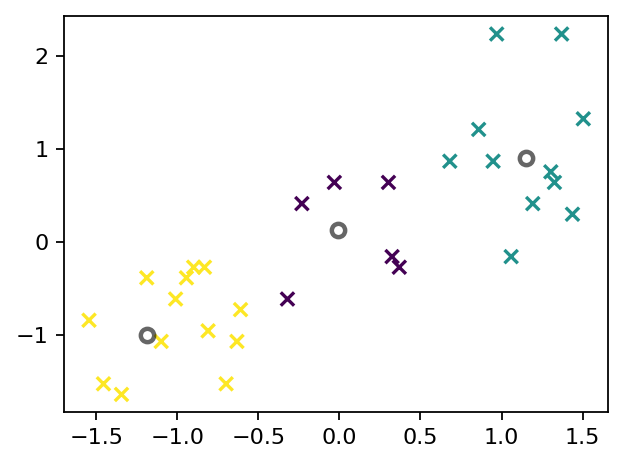

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)

plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='viridis', marker='x')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='white', alpha=0.6, edgecolors='black', linewidths=2)

plt.tight_layout()
plt.show()